# **Entrega 1**

<hr>

**Noms: **

**NIUs: **

**mails (gmail): **

<hr>

**Instruccions**

*   Primer copieu aquest notebook al vostre drive (Archivo>Guardar una copia en Drive).
*   Ompliu noms, NIUs i correus electrònics (gmail, si voleu rebre comentaris/feedback sobre la entrega) a l'encapçalament d'aquest Notebook.
*   Canvia el nom del Notebook a "Entrega1_niu.ipynb".
*   Aneu gravant/guardant el Notebook de forma regular.
*   Quan volgueu entregar, descarrega aquest quadern en format .ipynb i l'heu de pujar a la tasca del CV. Assegureu-vos que el fitxer té el nom correcte.
<hr>

Anem a resoldre numèricament una equació diferencial per dos mètodes numèrics ([Euler](http://en.wikipedia.org/wiki/Euler_method) i [Heun](http://en.wikipedia.org/wiki/Heun%27s_method)) i comparar amb la solució analítica.

L'equació és:

$$
y' = x-y
$$

amb la condició inicial de $y(0)=3$. La solució analítica d'aquesta equació diferencial és $y(x)=4e^{–x}+x-1$.

1.   Aplica el mètode de Euler i Heun amb un $\epsilon$=0.1 i compara amb la sol·lució analítica per x a l'interval [0,5]. Fes una gràfica de la sol·lució analítica i els punts que trobes amb aquests mètodes numèrics. Pots explicar el resultat que trobes? **[5 punts]**
2.   Compara punt a punt el que trobes de forma numèrica i la sol·lució analítica per als dos mètodes. D'aquesta comparació pots trobar el valor que es desvia més, en percentatge relatiu. Varía $\epsilon$ a l'interval [0.05,0.0005] i fes una gràfica d'aquesta màxima desviació que trobes, pels dos mètodes, respecte als valors de $\epsilon$. **[4 punts]**
3.    Existeixen llibreries a Python que et permeten solucionar aquesta EDO de forma numèrica amb el mètode d'Euler i Heun? Si és així, podeu proporcionar un codi que faci el mateix que heu implementat vosaltres, però fent servir aquestes llibreries? **[1 punts]**



In [ ]:
!pip install ode

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ode
import math

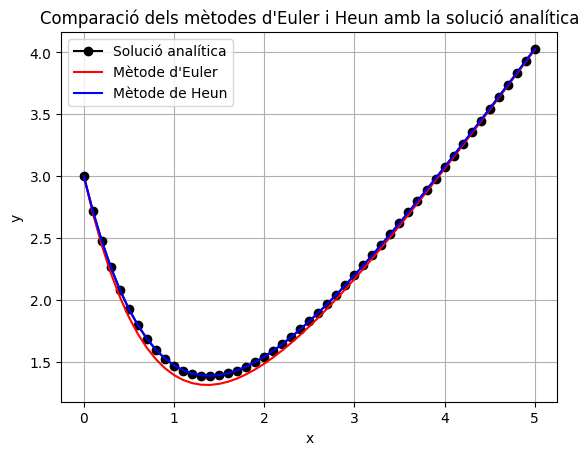

In [ ]:
# Secció 1

# definim ed y' = x - y
def f(x, y):
    return x - y

# sol analitica de ed
def sol_analitica(x):
    return 4 * np.exp(-x) + x - 1

# metode Euler
def euler(f, y0, x, epsilon):
    # creem un array per als valors de y del mateix tamany que l'array per als valors de x
    y = np.zeros(len(x))
    # definim el primer valor del array com a y0
    y[0] = y0
    # escribim el metode de euler
    for i in range(1, len(x)):
        y[i] = y[i-1] + f(x[i-1], y[i-1]) * epsilon
    return y

# metode Heun
def heun(f, y0, x, epsilon):
    # creem un array per als valors de y del mateix tamany que l'array per als valors de x
    y = np.zeros(len(x))
    # definim el primer valor del array com a y0
    y[0] = y0
    # escribim el metode de heun
    for i in range(1, len(x)):
        h = epsilon
        y_pred = y[i-1] + f(x[i-1], y[i-1]) * h
        y[i] = y[i-1] + 0.5 * h * (f(x[i-1], y[i-1]) + f(x[i], y_pred))
    return y

# parametres
x0, y0 = 0, 3
epsilon = 0.1
x_vals = np.arange(0, 5 + epsilon, epsilon)

# solucions
y_euler = euler(f, y0, x_vals, epsilon)
y_heun = heun(f, y0, x_vals, epsilon)
y_analitica = sol_analitica(x_vals)

# plotejem les solucions
plt.plot(x_vals, y_analitica, 'o-',label="Solució analítica", color='black')
plt.plot(x_vals, y_euler, label="Mètode d'Euler", color='red')
plt.plot(x_vals, y_heun, label="Mètode de Heun", color='blue')
plt.title("Comparació dels mètodes d'Euler i Heun amb la solució analítica")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Podem veure que el mètode d'Euler no s'ajusta a la perfecció mentre que el mètode de Heun sí que s'ajusta bastant bé a la solució analítica.

El mètode d'Euler funciona suposant que en el següent interval la derivada és la mateixa que la del punt on s'està avaluant. Per tant, la principal font d'error d'aquest mètode ve de zones on la derivada canvia molt de pressa i l'èpsilon és massa gran per a apreciar aquest canvi.

Així doncs podem assumir que els punts on Euler es desvia més de la solució analítica són aquells on la derivada canvia molt ràpid. Per trobar el punt on la desviació és màxima, podem calcular en quin punt el ritme de canvi de la 1a derivada és màxim. És a dir: en quin punt "l'acceleració" és màxima.

Malauradament la 2a derivada ($f''(x) = 4e^{-x}$) no té cap màxim o mínim , i per tant, no hi ha cap punt on puguem dir que l'acceleració és màxima. Però si mirem els valors de l'acceleració en l'interval de (0,5) podem veure el següent:






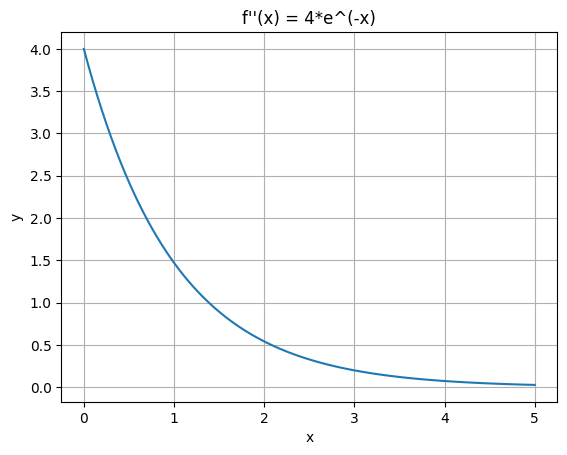

In [ ]:
def g(j):
  return 4 * np.exp(-j)

j = np.linspace(0, 5, 100)

# Calculate y values
k = g(j)

# Plot the function
plt.plot(j, k)
plt.title("f''(x) = 4*e^(-x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

En el gràfic veiem que l'acceleració té valors més grans en l'interval de (0,2) que en (2,5). Si ens fixem en el gràfic anterior, podem veure que els punts on hi ha més desviació, són els punts on hi ha més acceleració, i per tant, la derivada canvia més de pressa.

Un altre punt interessant a fixar-se, és que a partir de x=3 la funció es comença a comportar d'una forma molt semblant a una funció lineal (amb una derivada que tendeix a una constant, en aquest cas 1) i ,per tant, el mètode d'Euler millora molt la seva exactitud. Ja que les derivades en l'interval determinat per èpsilon són molt semblants a la del punt on s'avalua.

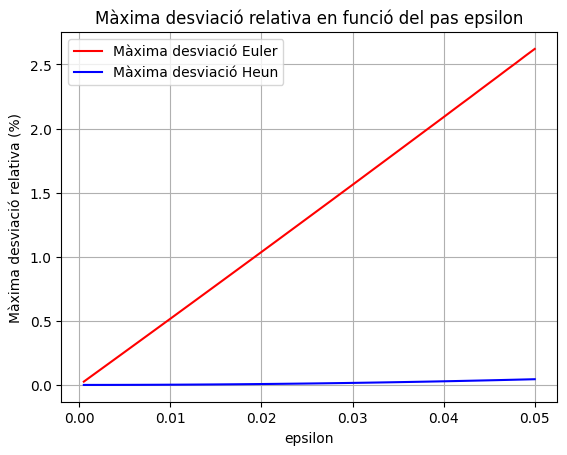

In [ ]:
# Secció 2

# Aquesta funcio troba l'error maxim entre 2 funcions utilitzant operacions vectorials de numpy
def max_deviation(sol_numerica, sol_analitica):
    deviations = np.abs((sol_numerica - sol_analitica) / sol_analitica) * 100
    return np.max(deviations)

# generem 50 valors (separats de forma uniforme) per a epsilons entre 0.0005 i 0.05
epsilons =  np.linspace( 0.0005, 0.05, num=50 )
#print(epsilons)

# creem llistes buides per anar escribint l'error maxim per a cada epsilon
max_dev_euler = []
max_dev_heun = []

# calculem la solucio de la funcio per cada epsilon per tots els metodes
for epsilon in epsilons:
    x_vals = np.arange(0, 5 + epsilon, epsilon)
    y_analitica = sol_analitica(x_vals)
    y_euler = euler(f, y0, x_vals, epsilon)
    y_heun = heun(f, y0, x_vals, epsilon)
    # escribim la desviacio maxima per cada metode i epsilon en les seves respectives llistes
    max_dev_euler.append(max_deviation(y_euler, y_analitica))
    max_dev_heun.append(max_deviation(y_heun, y_analitica))


#plotejo la grafica
plt.figure()
plt.plot(epsilons, max_dev_euler, label="Màxima desviació Euler", color='red')
plt.plot(epsilons, max_dev_heun, label="Màxima desviació Heun", color='blue')
plt.xlabel("epsilon")
plt.ylabel("Màxima desviació relativa (%)")
plt.title("Màxima desviació relativa en funció del pas epsilon")
plt.legend()
plt.grid(True)
plt.show()


Podem veure que a mesura que la epsilon augmenta, l'error també ho fa. També veiem que la màxima desviació del mètode d'Euler es molt més gran comparada amb la del mètode de Heun.

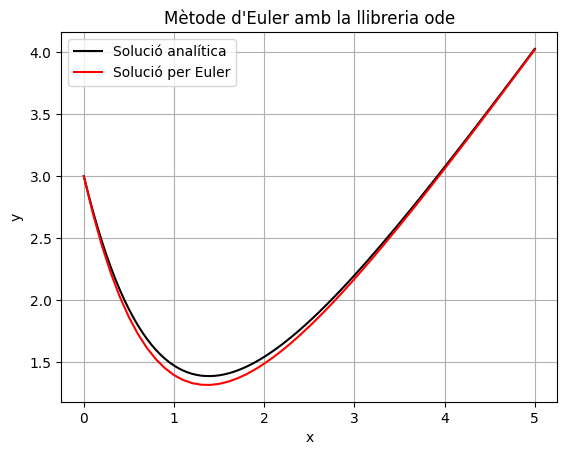

In [ ]:
# Secció 3
# Pel metode d'Euler he utilitzat aquesta llibreria (https://pypi.org/project/ode/)


# Aquesta funcio retorna un array de les derivades del sistema de EDOs que volem solucionar, en el nostre cas, nomes tenim una equacio
# la y seria un vector de valors de les funcions pel valor x del nostre sistema, en el nostre cas nomes te una component
epsilon = 0.1

def fode (x, y):
  return [f(x, y[0])]

# al igual que el metode programat en el primer aquest algorisme retorna tots els valors de la y per cada x
# el valors de la x els calcula internament, a partir de [x_0, x_f]=[0,5] i epsilon
# el array complet de valors el escriu en x_euler_ode
x_euler_ode, y_euler_ode = ode.euler(fode, [y0], [0,5], epsilon)

# En el primer cop que vaig utilitzar aquesta llibreria no havia d'agafar el primer element de l'array
# Pero d'un dia per l'altre em donava error i em demanava que agafes el primer element de l'array
# Aixi que aquesta llibreria potser no es gaire fiable
y_euler_ode =  y_euler_ode[0]
#print(y_euler_ode, x_euler_ode)

plt.plot(x_vals, y_analitica,label="Solució analítica", color='black')
plt.plot(x_euler_ode, y_euler_ode,label="Solució per Euler", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Mètode d'Euler amb la llibreria ode")
plt.legend()
plt.show()



Pel mètode de Heun he trobat aquesta llibreria (https://github.com/msoczi/odepy/tree/master) però no l'he pogut instal·lar mitjançant pip i, per tant, he seguit una suggerència de l'autor i he baixat el mòdul python a la classe ODE_solver que he incorporat en la següent cel·la.

In [ ]:
class ODE_solver:
    """
    Coming from (https://github.com/msoczi/odepy/tree/master)

    ...

    Attributes
    ----------
    equation : function
        function defining the equation to be solved
    N : int
        is an integer specifying the number of points at which the equation is calculated.
        Generally, the greater the number, the more accurate the solution.
    T : float
        the upper boundary of the interval [t_0, T] on which we solve the equation
    t0 : float
        the lower boundary of the interval [t_0, T] on which we solve the equation
    *args : float
        a set of initial conditions for dependent variables in the order x_0, x_1, x_2, ... .
        Depending on the order of the equation, an appropriate number of initial conditions should be given.
        For example, for an equation of order 2, two numbers should be given x_0(t_0), x_1(t_0)

    Methods
    -------
    euler()
        Use Euler schema to solve equation.
    rk2()
        Use 2th Order Runge-Kutta scheme to solve equation.
    rk4()
        Use 4th Order Runge-Kutta scheme to solve equation.
    heun()
        Use Heun schema to solve equation.
    """

    def __init__(self, equation, N, T, t0, *args):
        self.equation = equation
        self.T = T # górne ograniczenie czasu
        self.N = N # liczba punktów do ewaluacji
        self.eq_order = len(args) # rząd równania
        self.t_values = [t0] # lista czasów z elementem t0 - czasem początkowym
        for idx, item in enumerate(args): # lista z elementami kolejnych zmiennych zależnych x_0,x_1,...,x_n
            setattr(self, "x{}_values".format(idx), [item])

    def solve(self, method = 'rk4'):

        def euler():
            h=(self.T-self.t_values[0])/self.N # Integration step
            t = self.t_values[0] # iniscjalizacja czasu
            indep_vars = [getattr(self, name) for name in ['x'+str(i)+'_values' for i in range(self.eq_order)]]
            indep_vars = [i[0] for i in indep_vars]  # aktualne wartości kolejnych zmiennych x0,x_1,...,xn

            for k in range(1, self.N+1): # pętla do ewaluacji w każdym z N punktów
                for i in range(self.eq_order): # pętla do uaktualnienia wartości zmiennych zależnych
                    indep_vars[i]=indep_vars[i]+h*self.equation(t, *indep_vars)[i]
                    getattr(self, 'x'+str(i)+'_values').append(indep_vars[i])

                t=self.t_values[0]+k*h # aktualizacja czasu
                self.t_values.append(t)

        def rk2():
            h=(self.T-self.t_values[0])/self.N # Integration step
            t = self.t_values[0] # iniscjalizacja czasu
            indep_vars = [getattr(self, name) for name in ['x'+str(i)+'_values' for i in range(self.eq_order)]]
            indep_vars = [i[0] for i in indep_vars]  # aktualne wartości kolejnych zmiennych x0,x_1,...,xn

            # Slopes at the initial points
            k1=self.equation(t, *indep_vars)
            k2=self.equation(t+0.5*h, *[a+b*0.5*h for a,b in zip(indep_vars, k1)])

            for k in range(1, self.N+1): # pętla do ewaluacji w każdym z N punktów
                for i in range(self.eq_order): # pętla do uaktualnienia wartości zmiennych zależnych
                    indep_vars[i]=indep_vars[i]+h*k2[i]
                    getattr(self, 'x'+str(i)+'_values').append(indep_vars[i])

                t=self.t_values[0]+k*h # aktualizacja czasu
                self.t_values.append(t)
                # Slopes at the following points
                k1=self.equation(t, *indep_vars)
                k2=self.equation(t+0.5*h, *[a+b*0.5*h for a,b in zip(indep_vars, k1)])

        def rk4():
            h=(self.T-self.t_values[0])/self.N # Integration step
            t = self.t_values[0] # iniscjalizacja czasu
            indep_vars = [getattr(self, name) for name in ['x'+str(i)+'_values' for i in range(self.eq_order)]]
            indep_vars = [i[0] for i in indep_vars]  # aktualne wartości kolejnych zmiennych x0,x_1,...,xn

            # Slopes at the initial points
            k1=self.equation(t, *indep_vars)
            k2=self.equation(t+(1/2)*h, *[a+b*(1/2)*h for a,b in zip(indep_vars, k1)])
            k3=self.equation(t+(1/2)*h, *[a+b*(1/2)*h for a,b in zip(indep_vars, k2)])
            k4=self.equation(t+h, *[a+b*h for a,b in zip(indep_vars, k3)])

            for k in range(1, self.N+1): # pętla do ewaluacji w każdym z N punktów
                for i in range(self.eq_order): # pętla do uaktualnienia wartości zmiennych zależnych
                    indep_vars[i]=indep_vars[i]+h*((1/6)*k1[i]+(1/3)*k2[i]+(1/3)*k3[i]+(1/6)*k4[i])
                    getattr(self, 'x'+str(i)+'_values').append(indep_vars[i])

                t=self.t_values[0]+k*h # aktualizacja czasu
                self.t_values.append(t)
                # Slopes at the following points
                k1=self.equation(t, *indep_vars)
                k2=self.equation(t+(1/2)*h, *[a+b*(1/2)*h for a,b in zip(indep_vars, k1)])
                k3=self.equation(t+(1/2)*h, *[a+b*(1/2)*h for a,b in zip(indep_vars, k2)])
                k4=self.equation(t+h, *[a+b*h for a,b in zip(indep_vars, k3)])

        def heun():
            h=(self.T-self.t_values[0])/self.N # Integration step
            t = self.t_values[0] # iniscjalizacja czasu
            indep_vars = [getattr(self, name) for name in ['x'+str(i)+'_values' for i in range(self.eq_order)]]
            indep_vars = [i[0] for i in indep_vars]  # aktualne wartości kolejnych zmiennych x0,x_1,...,xn

            # Slopes at the initial points
            k1=self.equation(t, *indep_vars)
            k2=self.equation(t+(1/3)*h, *[a+b*(1/3)*h for a,b in zip(indep_vars, k1)])
            k3=self.equation(t+(2/3)*h, *[a+b*(2/3)*h for a,b in zip(indep_vars, k2)])

            for k in range(1, self.N+1): # pętla do ewaluacji w każdym z N punktów
                for i in range(self.eq_order): # pętla do uaktualnienia wartości zmiennych zależnych
                    indep_vars[i]=indep_vars[i]+h*((1/4)*k1[i]+(3/4)*k3[i])
                    getattr(self, 'x'+str(i)+'_values').append(indep_vars[i])

                t=self.t_values[0]+k*h # aktualizacja czasu
                self.t_values.append(t)
                # Slopes at the following points
                k1=self.equation(t, *indep_vars)
                k2=self.equation(t+(1/3)*h, *[a+b*(1/3)*h for a,b in zip(indep_vars, k1)])
                k3=self.equation(t+(2/3)*h, *[a+b*(2/3)*h for a,b in zip(indep_vars, k2)])

        if method == 'rk4':
            rk4()
        elif method == 'rk2':
            rk2()
        elif method == 'euler':
            euler()
        elif method == 'heun':
            heun()
        else:
            raise TypeError(f"Wrong method argument. There is not '{method}' method available.")

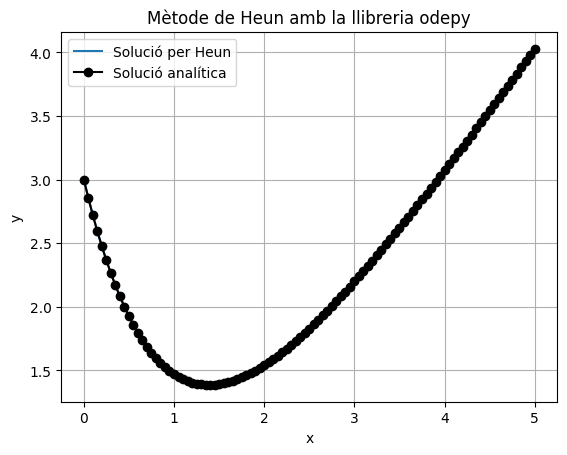

In [ ]:
def fodepy(x, *y):
    return (f(x, y[0]),)

# escollim 50 particions desde 0 fins a 5 (simulant un epsilon de 0.1) i la condicio inicial y(0)=3
rk_solver = ODE_solver(fodepy, 50, 5, 0, 3)

# escollim el metode de Heun
rk_solver.solve(method = 'heun')

# plotejem la solucio
# en aquesta llibreria la t seria la nostra x i el x0 seria la nostra y
plt.plot(rk_solver.t_values, rk_solver.x0_values,label="Solució per Heun")
plt.plot(x_vals, y_analitica, 'o-', label="Solució analítica", color='black')
plt.title('Mètode de Heun amb la llibreria odepy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
